In [1]:
from qiskit import *
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram

In [2]:
# Enigme 1 : La porte du trésor
# Un trésor est caché derrière l'une des 2 portes.
# Un guardien se tient devant chaque porte, l'un ment, l'autre dit la vérité, mais nous ne savons pas lequel.
# Quelle porte l'autre garde me dirait-il de ne pas prendre?

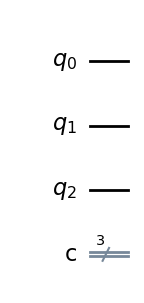

In [3]:
# Nous commençons par implémenter l'énigme initiale (sans la résoudre)
# Nous avons besoin de 3 qubits au total (2 pour les réponses des 2 gardiens et 1 pour indiquer quel gardien ment)
circ = QuantumCircuit(3, 3)
circ.draw('mpl')

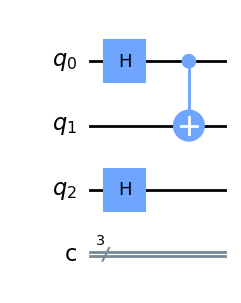

In [4]:
# Les qubits étant initialisés à 0, il faut appliquer une porte hadamard afin de superposé l'état 0 et 1 afin que l'on ne sache pas "dérrière quelle porte se trouve le trésor"
# A partir du moment ou on ouvre une porte on connait tout de suite le résultat de l'autre porte, on va donc intriquer les 2 premiers qubits avec la porte CNOT afin que les 2 qubits donnent le même résultat
# De même pour le qubit du mensonge, on ne sait pas quel gardien ment donc on va appliquer la porte hadamard pour superposer les états 0 et 1
circ.h(0)
circ.cx(0,1)
circ.h(2)
circ.draw('mpl')

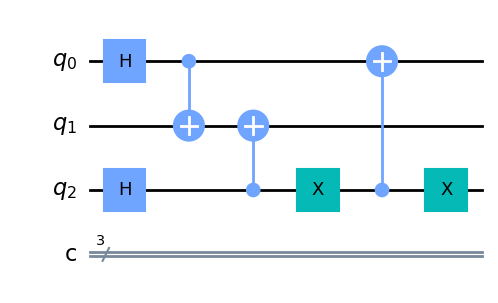

In [5]:
# Maintenant on veut inverser la réponse du gardien qui ment => circuit du mensonge
# CNOT inverse la réponse si le qubit vaut 1 et ne fait rien s'il vaut 0, on va dire que si q2 = 1 alors q1 ment et si q2 = 0 c'est q0 qui ment
circ.cx(2,1)
# On inverse la valeur de q2
circ.x(2)
circ.cx(2,0)
# On inverse à nouveau pour retrouver la valeur de départ et savoir quel gardien a menti lorsqu'on effectuera la mesure
circ.x(2)
circ.draw('mpl')

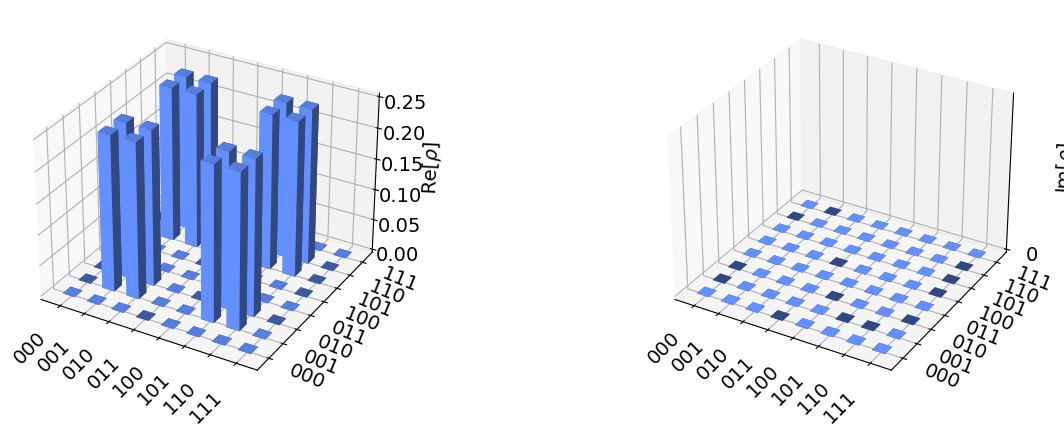

In [6]:
# Les 4 possibilités sont : 000, 011, 100, 111
# Et sont bien à 25% de probabilité chacune
# Mais q0 et q1 donnent un résultat inverse
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)

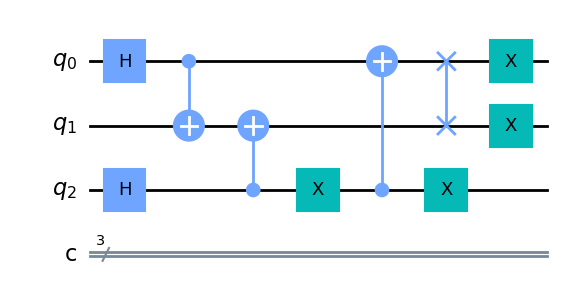

In [7]:
# Maintenant on va implémenter la résolution de l'énigme
# On va donc utiliser la porte swap pour récupérer la réponse de l'autre gardien auquelle on applique la porte NOT pour avoir la réponse à quelle porte ne pas prendre
circ.swap(0, 1)
circ.x(0)
circ.x(1)
circ.draw('mpl')

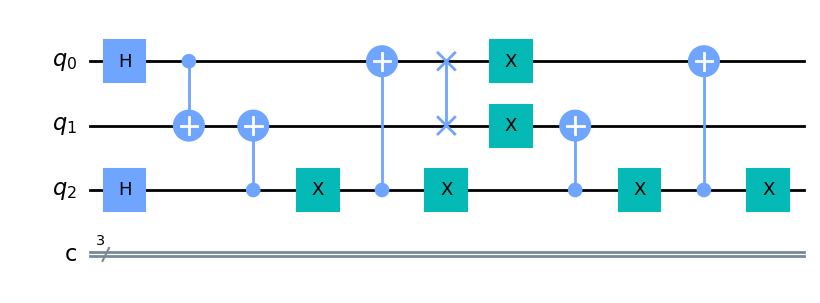

In [8]:
# Le fait de demander au gardien d'interroger l'autre gardien déclenche à nouveau le circuit du mensonge ce qui nous permet au final de l'annuler en l'implémentant une nouvelle fois
circ.cx(2,1)
# On inverse la valeur de q2
circ.x(2)
circ.cx(2,0)
# On inverse à nouveau pour retrouver la valeur de départ et savoir quel gardien a menti lorsqu'on effectuera la mesure
circ.x(2)
circ.draw('mpl')

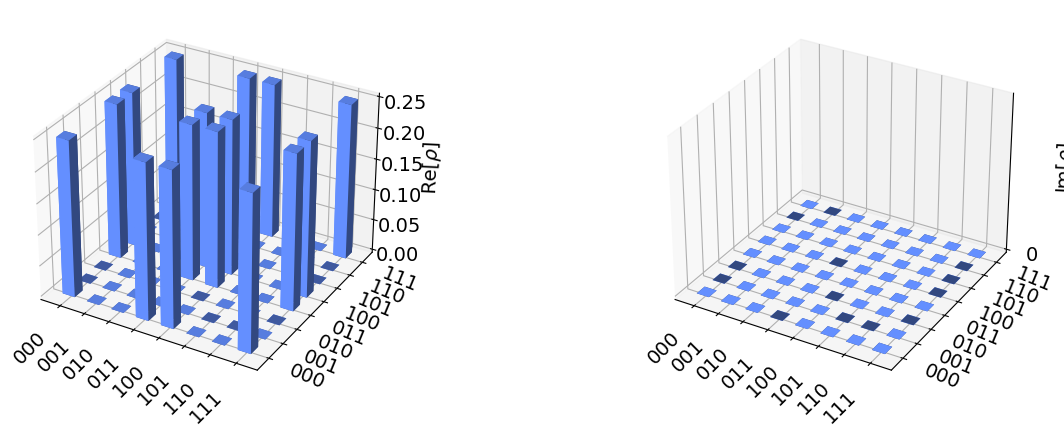

In [9]:
# Les 4 possibilités sont : 000, 011, 100, 111
# Et sont bien à 25% de probabilité chacune
# Mais cette fois ci les 2 gardiens q0 et q1 donne le même résultat
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()

outputstate = result.get_statevector(circ, decimals=3)
plot_state_city(outputstate)

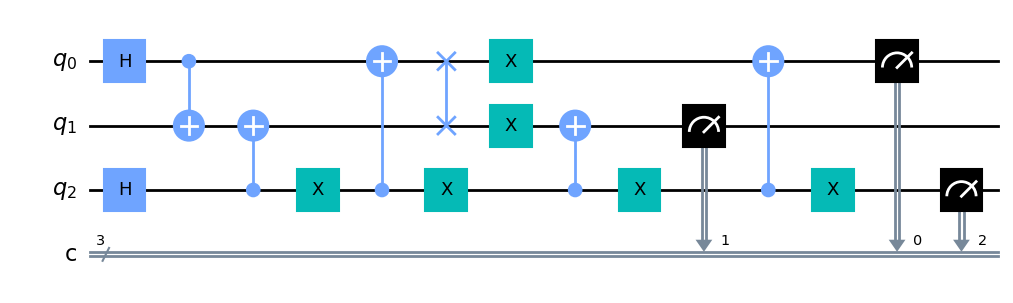

In [10]:
# On peut aussi mesurer les qubits manuellement
circ.measure(0,0)
circ.measure(1,1)
circ.measure(2,2)
circ.draw('mpl')